In [1]:
!pip install imutils

  Stored in directory: /root/.cache/pip/wheels/db/23/45/fc7424906880ffa9577a2a428b961f2b79e0e21d9f71e7e6bc
Successfully built imutils


### Due to inavalaibility of resoucres I am using [matterport/Mask_RCNN](https://github.com/matterport/Mask_RCNN)

In [2]:
import os 
import sys
import random
import math
import numpy as np
import cv2
import matplotlib.pyplot as plt
import json
import pydicom
from imgaug import augmenters as iaa
from tqdm import tqdm
import pandas as pd 
import glob
import imutils
from sklearn.model_selection import KFold

In [3]:
pwd

'/kaggle/working'

In [4]:
images=[]
for i in os.listdir("../input/sampleimages"):
    image1 = cv2.imread("../input/sampleimages/"+str(i))
    images.append(image1)

In [5]:
#cloning github repository
!git clone https://www.github.com/matterport/Mask_RCNN.git
os.chdir('Mask_RCNN')

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 125.23 MiB | 27.03 MiB/s, done.
Resolving deltas: 100% (565/565), done.


In [6]:
# Import Mask RCNN
sys.path.append(os.path.join('/kaggle/working', 'Mask_RCNN'))  # To find local version of the library
from mrcnn.config import Config
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log

Using TensorFlow backend.


In [7]:
#downloading pretrained model
!wget --quiet https://github.com/matterport/Mask_RCNN/releases/download/v2.0/mask_rcnn_coco.h5

COCO_WEIGHTS_PATH = "./mask_rcnn_coco.h5"

In [8]:
CLASS_NAMES = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

In [9]:
class SimpleConfig(Config):
    # give the configuration a recognizable name
    NAME = "coco_inference"
    # set the number of GPUs to use along with the number of images
    # per GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    # number of classes on COCO dataset
    NUM_CLASSES = 81

In [10]:
config = SimpleConfig()
config.display()
model = modellib.MaskRCNN(mode="inference", config=config, model_dir=os.getcwd())
model.load_weights("./mask_rcnn_coco.h5", by_name=True)


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [11]:
image = cv2.imread("./images/3862500489_6fd195d183_z.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (0,0), fx=500/400, fy=500/400)
print("[INFO] making predictions with Mask R-CNN...")
result = model.detect([image], verbose=1)

[INFO] making predictions with Mask R-CNN...
Processing 1 images
image                    shape: (800, 531, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


In [12]:
r1 = result[0]
visualize.display_instances(image, r1['rois'], r1['masks'],
                            r1['class_ids'], CLASS_NAMES, r1['scores'])

[INFO] making predictions with Mask R-CNN...
Processing 1 images
image                    shape: (218, 362, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  129.30000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


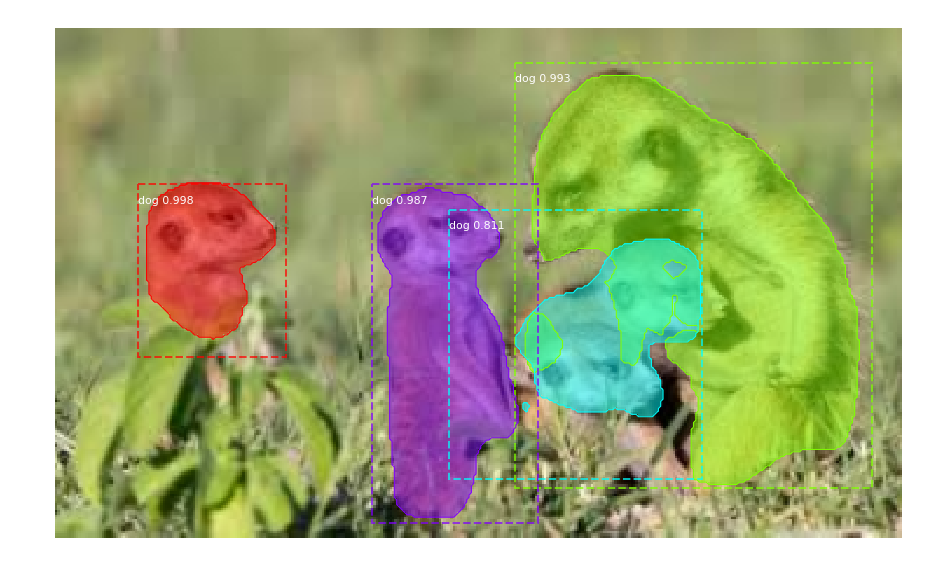

[INFO] making predictions with Mask R-CNN...
Processing 1 images
image                    shape: (450, 600, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


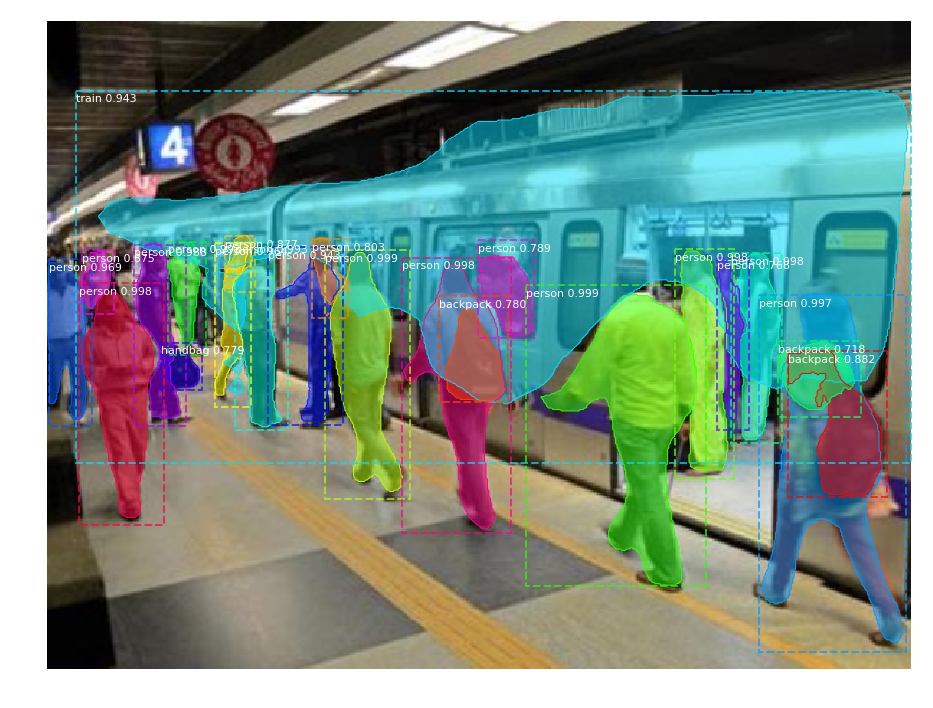

[INFO] making predictions with Mask R-CNN...
Processing 1 images
image                    shape: (834, 1500, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1500.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


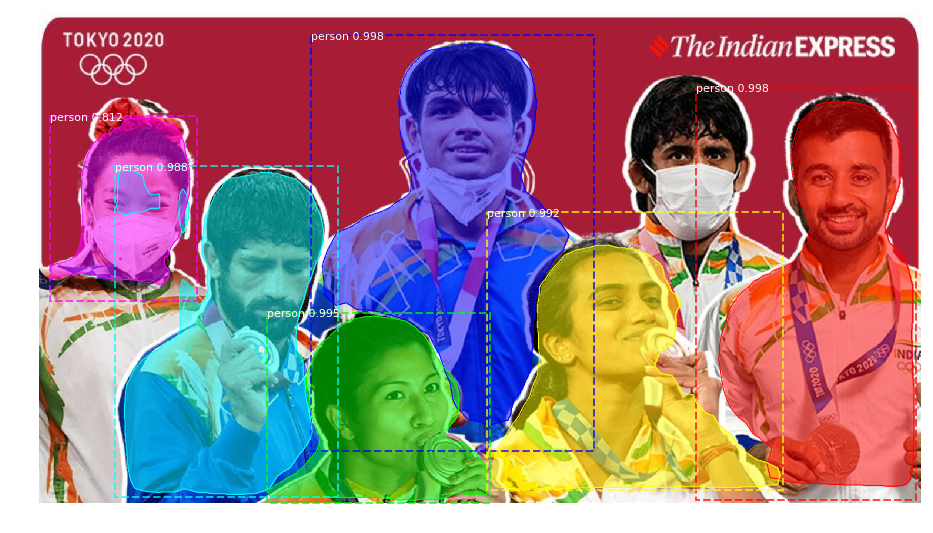

[INFO] making predictions with Mask R-CNN...
Processing 1 images
image                    shape: (1590, 2400, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  149.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 2400.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


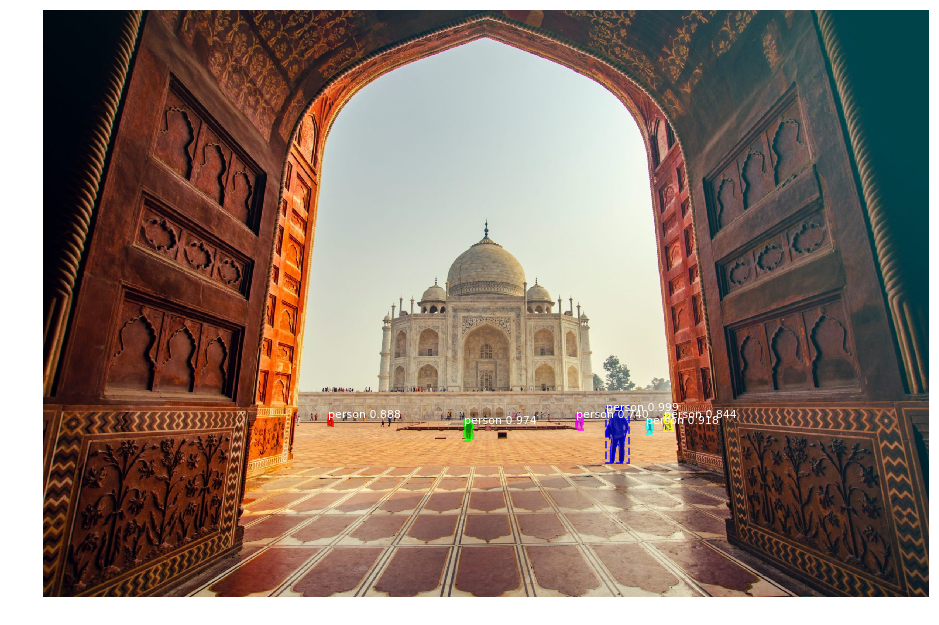

[INFO] making predictions with Mask R-CNN...
Processing 1 images
image                    shape: (600, 800, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  149.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


[INFO] making predictions with Mask R-CNN...
Processing 1 images
image                    shape: (229, 344, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


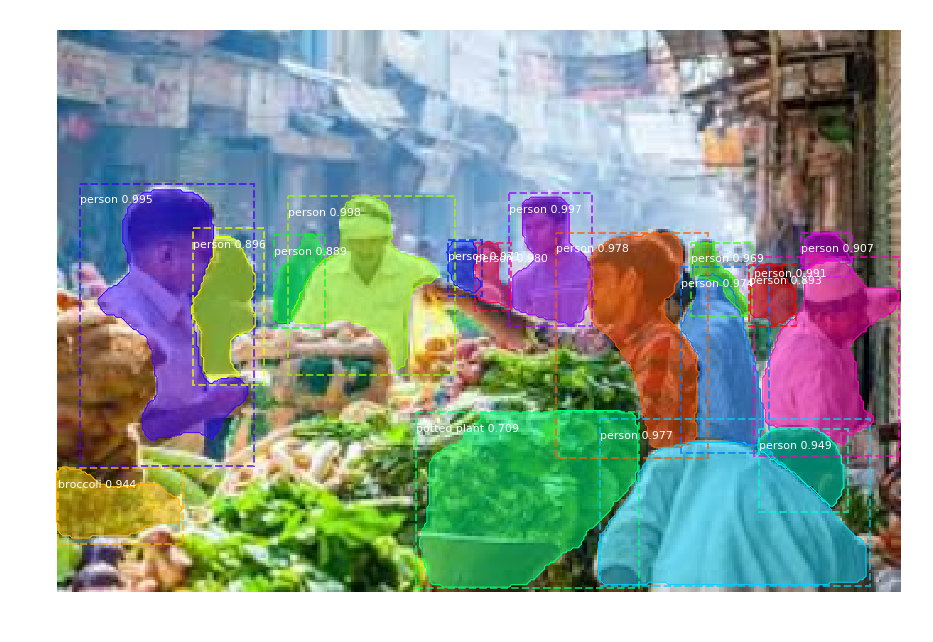

[INFO] making predictions with Mask R-CNN...
Processing 1 images
image                    shape: (219, 360, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


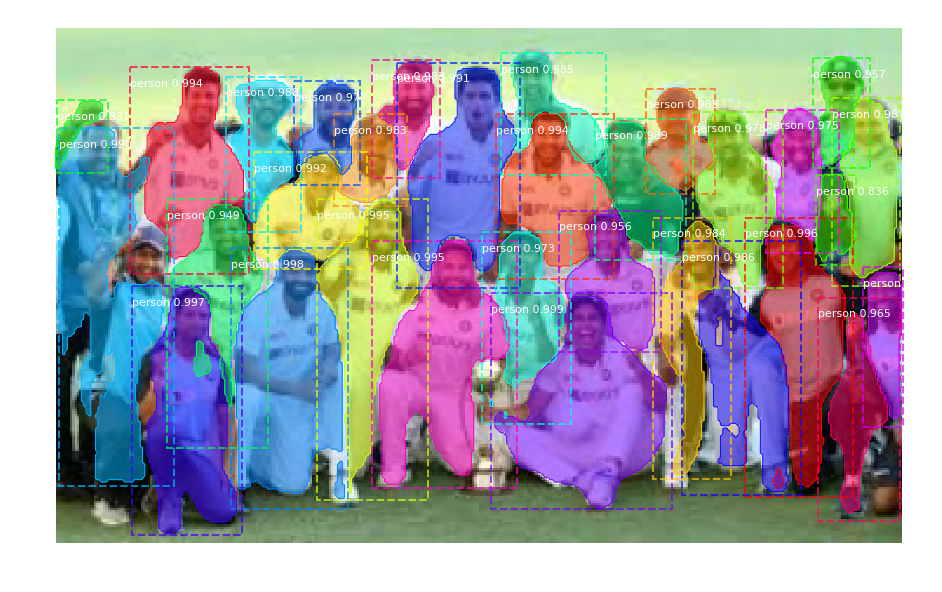

In [13]:
for i in images:
    image = cv2.cvtColor(i, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (0,0), fx=500/400, fy=500/400)
    print("[INFO] making predictions with Mask R-CNN...")
    result = model.detect([image], verbose=1)
    r1 = result[0]
    visualize.display_instances(image, r1['rois'], r1['masks'],
                                r1['class_ids'], CLASS_NAMES, r1['scores'])